In [1]:
import sys
sys.path.append("C:/Users/sumit/OneDrive/Escritorio/Universidad/P_Curriculares/Fundamentos Prácticos de Machine Learning/venv/Lib/site-packages")

%pwd

'C:\\Users\\sumit\\OneDrive\\Escritorio\\Universidad\\P_Curriculares\\Fundamentos Prácticos de Machine Learning\\Jupyter Notebooks'

## Regresiones logísticas

**¿Cuál es la diferencia entre regresión lineal y regresión logística?**

La **Regresión Lineal**, se utiliza para proyectos de regresión, es decir cuando queremos predecir un valor numérico, por ejemplo, queremos predecir el precio de una casa o el sueldo de una persona de acuerdo a los años de experiencia.

Por su parte el algoritmo de **Regresión Logística** se utiliza para proyectos de clasificación, si queremos conocer si una persona vive o no el naufragio del Titanic, o si una acción de la bolsa de valores va a subir o no.


**Vamos a crear un modelo de regresión logística que nos diga si una persona tiene diabetes o no**:


In [3]:
import pandas as pd 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
diabetes = pd.read_csv('../Datasets/diabetes.csv')
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.shape

(768, 9)

Obtenemos los atributos con los que vamos a aprender para poder encontrar las relaciones:

In [6]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = diabetes[feature_cols]
y = diabetes.Outcome

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

**Entrenamiento del modelo:**

In [10]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

C:\Users/sumit/OneDrive/Escritorio/Universidad/P_Curriculares/Fundamentos Prácticos de Machine Learning/venv/Lib/site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- 0: no tiene diabetes
- 1: si tiene (con relación a lo aprendido)

In [11]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

**Evaluación del modelo construido:**

Los modelos de clasificación son capaces de predecir cuál es la etiqueta correspondiente a cada ejemplo o instancia basado en aquello que ha aprendido del conjunto de datos de entrenamiento. Estos modelos necesitan ser evaluados de alguna manera y posteriormente comparar los resultados obtenidos con aquellos que fueron entrenados.

Una manera de hacerlo es mediante la matriz de confusión la cual nos permite evaluar el desempeño de un algoritmo de clasificación a partir del conteo de los aciertos y errores en cada una de las clases del algoritmo.

Como su nombre lo dice tenemos una matriz que nos ayuda a evaluar la predicción mediante positivos y negativos como se muestra en la figura.

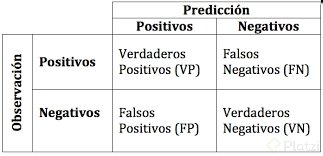

Los verdaderos positivos (VP) son aquellos que fueron clasificados correctamente como positivos como el modelo.
Los verdaderos negativos (VN) corresponden a la cantidad de negativos que fueron clasificados correctamente como negativos por el modelo.
Los falsos negativos (FN) es la cantidad de positivos que fueron clasificados incorrectamente como negativos.
Los falsos positivos (FP) indican la cantidad de negativos que fueron clasificados incorrectamente como positivos.

Para que lo anterior quede más claro consideremos el siguiente ejemplo.

Un médico tiene cuatro pacientes y a cada uno se les solicitó un examen de sangre y por error el laboratorio realizó también un estudio de embarazo, cuando los pacientes llegan el médico les da los resultado.

A la primera paciente le da la noticia que está embarazada y ella ya lo sabía dado que tiene 3 meses de embarazo, es decir, un verdadero positivo.

El siguiente paciente llega y le dice que no está embarazada y es una clasificación evidente dado que es hombre (Verdadero negativo).

El tercer paciente llega y los resultados le indican que no está embarazada sin embargo tiene cuatro meses de embarazo, es decir, que la ha clasificado como falso negativo.

Y por último el cuarto paciente sus resultados han indicado que está embarazado sin embargo es hombre por lo cual es imposible, dando como resultado un falso positivo.

Lo anterior es un proceso que se realiza por cada instancia a clasificar y nos permite calcular la exactitud y su tasa de error con las siguientes fórmulas.

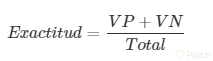

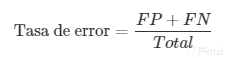

Por lo tanto a mayor exactitud nuestro modelo ha aprendido mejor.

In [13]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 24,  38]], dtype=int64)

Text(0.5, 257.44, 'Etiqueta de predicción')

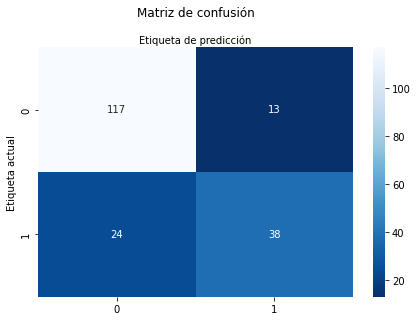

In [29]:
import numpy as np
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de predicción')

In [30]:
print("Exactitud", metrics.accuracy_score(y_test, y_pred))

Exactitud 0.8072916666666666
